## Import Relevant Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.layers import *
from keras.models import *
from keras.preprocessing import image

In [ ]:
# The link for the data collected from kaggle and github
# https://drive.google.com/file/d/1TtC4tejjYWDqa84K4DGy4dfFQX0Envkh/view?usp=sharing

## Setting the path from where data is to be obtained

In [2]:
path_train="CovidDataset/Train"
path_val="CovidDataset/Val"

## Creating the CNN Model

In [3]:
model=Sequential()

model.add(Conv2D(32,(3,3),activation="relu",input_shape=(224,224,3)))
model.add(Conv2D(64,(3,3),activation="relu",))
model.add(MaxPooling2D((2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(64,(3,3),activation="relu"))
model.add(MaxPooling2D((2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(128,(3,3),activation="relu"))
model.add(MaxPooling2D((2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(64,activation="relu"))
model.add(Dropout(0.25))
model.add(Dense(1,activation="sigmoid"))

model.compile(loss=keras.losses.binary_crossentropy,
              optimizer="adam",
              metrics=["accuracy"])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 222, 222, 32)      896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 220, 220, 64)      18496     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 110, 110, 64)      0         
_________________________________________________________________
dropout (Dropout)            (None, 110, 110, 64)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 108, 108, 64)      36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 54, 54, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 54, 54, 64)        0

### Creating a generator which will go through the directories and randomly give a batch of images

In [4]:
train_datagen=image.ImageDataGenerator(rescale=1.0/255.0,
                                       shear_range=0.2,
                                       zoom_range=0.2,
                                       horizontal_flip=True)

train_data_generator=train_datagen.flow_from_directory(path_train,
                                                       target_size=(224,224),
                                                       batch_size=32,
                                                       class_mode="binary")


Found 224 images belonging to 2 classes.


### Creating a similar generator (but without augmentation) for validation data

In [5]:
val_datagen=image.ImageDataGenerator(rescale=1.0/255.0)

val_data_generator=val_datagen.flow_from_directory(path_val,
                               target_size=(224,224),
                               batch_size=32,
                               class_mode="binary")

Found 60 images belonging to 2 classes.


### Running the model keeping the history of every step

In [6]:
hist=model.fit_generator(generator=train_data_generator,
                         steps_per_epoch=7,
                         epochs=10,
                         validation_data=val_data_generator,
                         validation_steps=2)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/10
7/7 [==============================] - 27s 4s/step - loss: 1.8236 - accuracy: 0.4688 - val_loss: 0.6939 - val_accuracy: 0.5000
Epoch 2/10
7/7 [==============================] - 28s 4s/step - loss: 0.6579 - accuracy: 0.5580 - val_loss: 0.6343 - val_accuracy: 0.8667
Epoch 3/10
7/7 [==============================] - 27s 4s/step - loss: 0.4393 - accuracy: 0.8393 - val_loss: 0.3589 - val_accuracy: 0.8667
Epoch 4/10
7/7 [==============================] - 32s 5s/step - loss: 0.3311 - accuracy: 0.8571 - val_loss: 0.2378 - val_accuracy: 0.9500
Epoch 5/10
7/7 [==============================] - 34s 5s/step - loss: 0.2436 - accuracy: 0.9286 - val_loss: 0.1589 - val_accuracy: 0.9500
Epoch 6/10
7/7 [==============================] - 31s 4s/step - loss: 0.2162 - accuracy: 0.9152 - val_loss: 0.1795 - val_accuracy: 0.9167
Epoch 7/10
7/7 [==============================] - 31s 4s/step - loss: 0.2079 - accuracy: 0.9196 

In [7]:
train_data_generator.class_indices

{'Covid': 0, 'Normal': 1}

### Plotting the path of accuracy and loss through epochs using history object

In [8]:
acc=hist.history['accuracy']
val_acc=hist.history['val_accuracy']
loss=hist.history['loss']
val_loss=hist.history['val_loss']

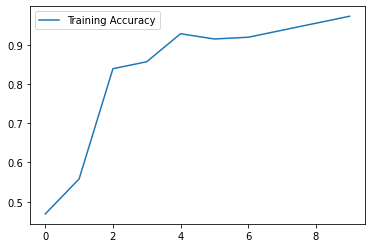

In [9]:
plt.plot(acc,label='Training Accuracy')
plt.legend()
plt.show()

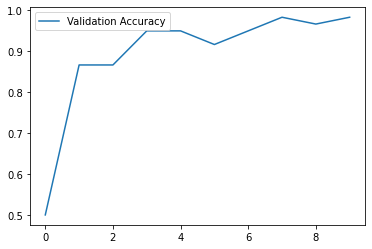

In [10]:
plt.plot(val_acc,label="Validation Accuracy")
plt.legend()
plt.show()

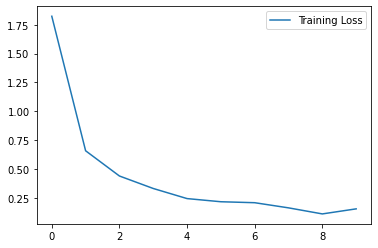

In [11]:
plt.plot(loss,label="Training Loss")
plt.legend()
plt.show()

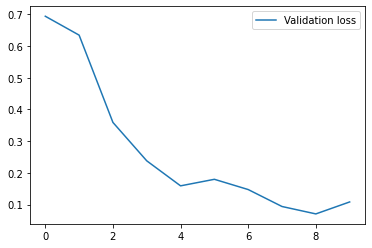

In [12]:
plt.plot(val_loss,label="Validation loss")
plt.legend()
plt.show()